In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd
import datetime as dt

from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:
# Create engine to hawaii.sqlite
db_uri = 'sqlite:////Users/Jean/Documents/Bootcamp/sqlalchemy-challenge/Resources/hawaii.sqlite'
engine = create_engine(db_uri)

In [26]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0, 0.5, 'Inches')

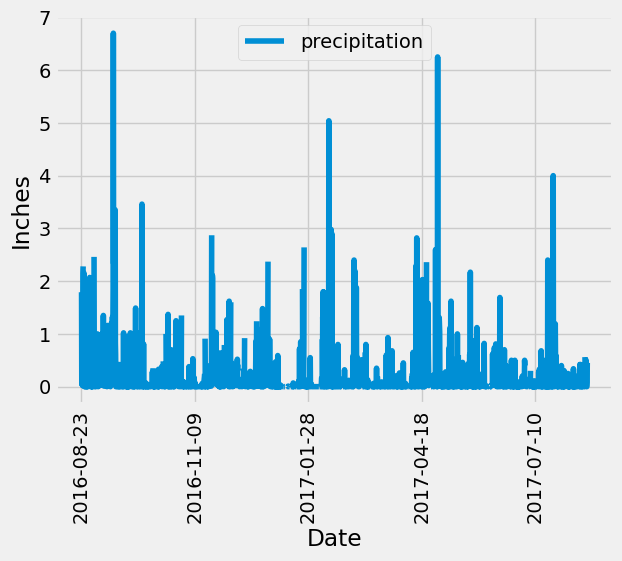

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
query_date = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
#results_df['date'] = pd.to_datetime(results_df['date'])  # Ensure the date column is in datetime format
results_df = results_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data 
results_df.plot(x='Date', y='Precipitation (in)', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.id)).scalar()
print(total_stations)

9


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)). \
    group_by(Measurement.station). \
    order_by(func.count(Measurement.station).desc()). \
    all()

pprint(most_active_stations)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

min = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').scalar()
max = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').scalar()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').scalar()

print(min, max, avg)

54.0 85.0 71.66378066378067


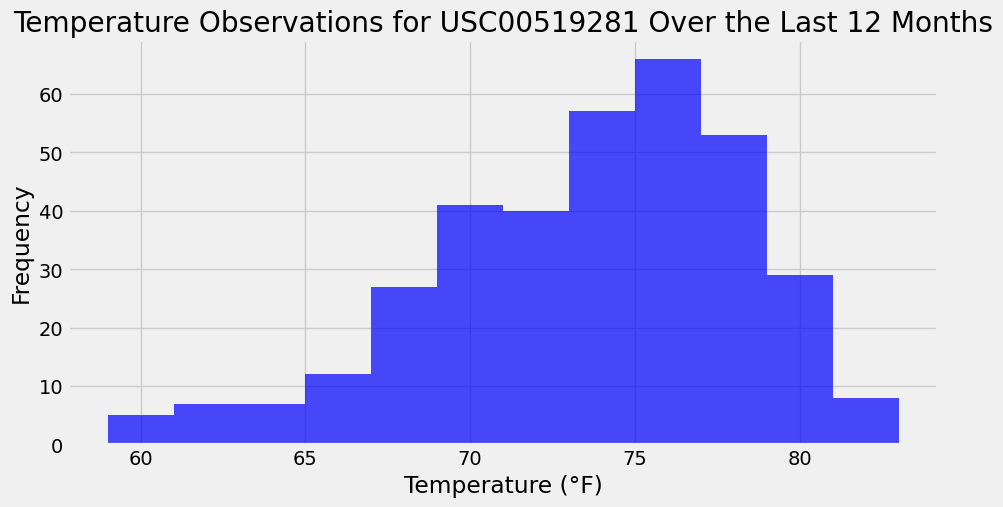

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
query_date = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and temperature observations
temp_results = session.query(Measurement.date, Measurement.tobs). \
    filter(Measurement.date >= query_date). \
    filter(Measurement.station == 'USC00519281'). \
    all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_results_df = pd.DataFrame(temp_results, columns=['date', 'temperature'])

# Ensure the date column is in datetime format
temp_results_df['date'] = pd.to_datetime(temp_results_df['date'])

# Sort the DataFrame by date
temp_results_df = temp_results_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data as a histogram
plt.figure(figsize=(10, 5))
plt.hist(temp_results_df['temperature'], bins=12, alpha=0.7, color='blue')
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Observations for USC00519281 Over the Last 12 Months")
plt.show()

# Close Session

In [86]:
# Close Session
session.close()